In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numba import jit

In [2]:
path = 'img_in/dan-smedley-j4OEr2IMBOs-unsplash.jpg' # path to file
img = cv2.imread(path) # read image 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def sp(img: np.ndarray, part: float)->np.ndarray:
    random_index = (np.random.rand(img.shape[0], img.shape[1])*100).astype(np.uint8) # генерируем случаный индексы
    output = np.copy(img) # делаем глубокую копию изображения
    output[random_index<=part] = 255 # заменяем значение пиксела
    return output

In [4]:
imgsp25 = sp(img, 25)

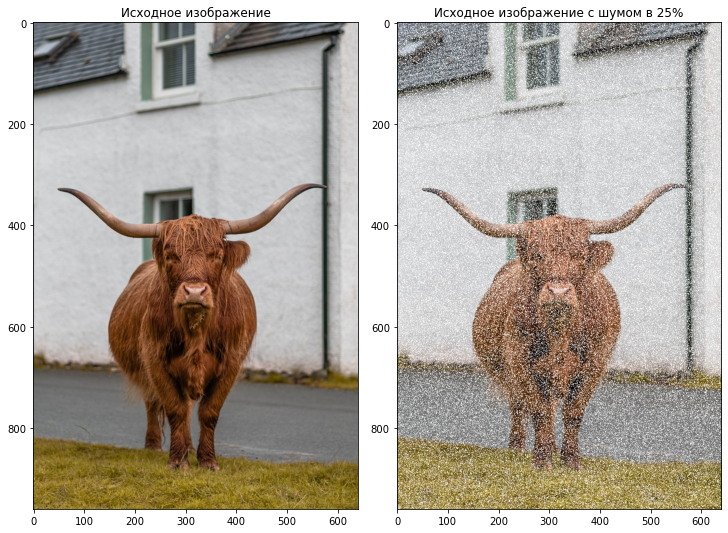

In [5]:
fig, axs = plt.subplots(1,2,figsize=(10,10), constrained_layout=True)
axs[0].imshow(img)
axs[0].set_title("Исходное изображение")
axs[1].imshow(imgsp25)
axs[1].set_title("Исходное изображение с шумом в 25%")
plt.show()

In [6]:
kernel = np.array([
    [1,0,0,0,1],
    [0,2,0,2,0],
    [0,0,3,0,0],
    [0,2,0,2,0],
    [1,0,0,0,1]
])

In [27]:
def ranked_smoothing_image(image, weighted_window, rank):
  return cv2.merge(list(map(lambda channel: ranked_smoothing(channel, weighted_window, rank), cv2.split(image))))

def ranked_smoothing(image, weighted_window, rank):
  h, w = image.shape
  window_h, window_w = weighted_window.shape
  new_image = np.zeros((h, w), np.uint8)
  for i in prange(window_h // 2, h - window_h // 2):
    for j in prange(window_w // 2, w - window_w // 2):
      cur_window = image[i - window_h // 2: i + window_h // 2 + 1, j - window_w // 2: j +  window_w // 2 + 1]
      window_elements = multiply(cur_window, weighted_window)
      new_image[i][j] = get_ranked(window_elements, rank)

  return new_image

def multiply(window, weighted_window):
    result = []
    for i in prange(window.shape[0]):
        for j in prange(window.shape[1]):
            result.extend([window[i, j]] * weighted_window[i, j])
    return result

def get_ranked(arr, rank):
    arr.sort()
    return arr[rank]

In [29]:
def MSE(img: np.ndarray, img_processing: np.ndarray) -> float:
    return np.sum((img - img_processing)**2)/(img.shape[0]*img.shape[1]*img.shape[2])

In [30]:
img_filt_med = ranked_smoothing_image(imgsp25, kernel, np.sum(kernel)//2)

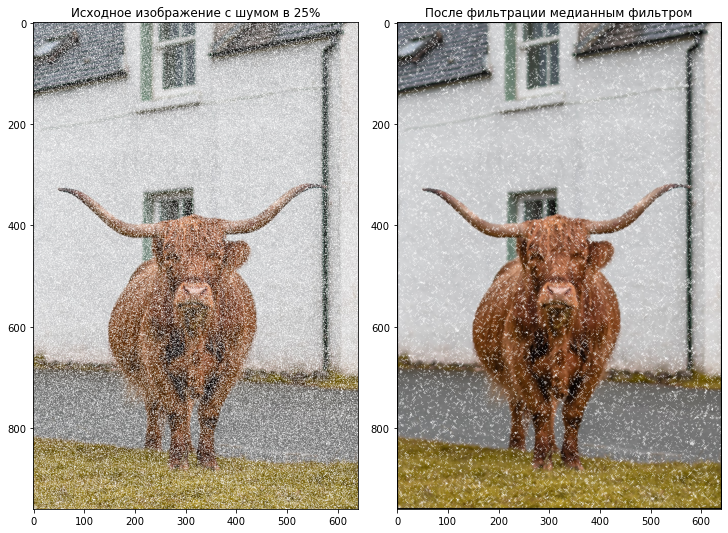

In [31]:
fig, axs = plt.subplots(1,2,figsize=(10,10), constrained_layout=True)
axs[0].imshow(imgsp25)
axs[0].set_title("Исходное изображение с шумом в 25%")
axs[1].imshow(img_filt_med)
axs[1].set_title("После фильтрации медианным фильтром")
plt.show()

In [35]:
img_filt_rank = ranked_smoothing_image(imgsp25, kernel, 1)

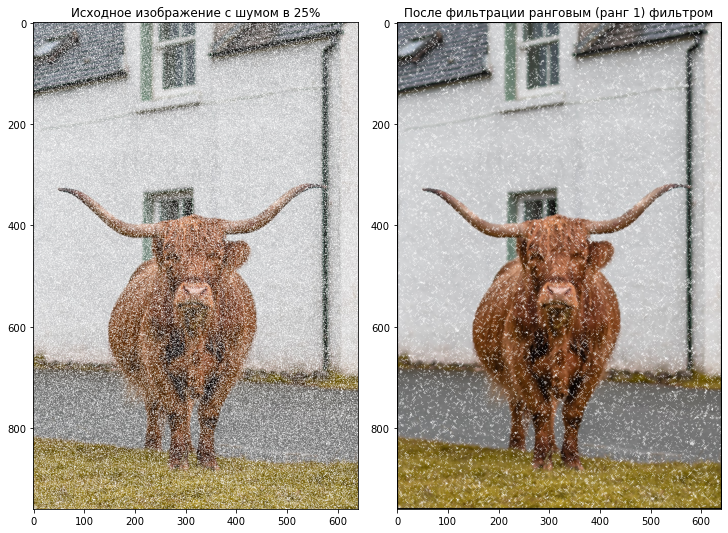

In [36]:
fig, axs = plt.subplots(1,2,figsize=(10,10), constrained_layout=True)
axs[0].imshow(imgsp25)
axs[0].set_title("Исходное изображение с шумом в 25%")
axs[1].imshow(img_filt_med)
axs[1].set_title("После фильтрации ранговым (ранг 1) фильтром")
plt.show()

In [34]:
for rank in range(1, 11, 1):
    print(f"MSE: {MSE(img,ranked_smoothing_image(imgsp25, kernel, rank))}")

MSE: 39.62571126302083
MSE: 32.063549262152776
MSE: 26.34059027777778
MSE: 22.124304470486113
MSE: 21.898046875
MSE: 23.693806966145832
MSE: 30.65980902777778
MSE: 40.32328776041667
MSE: 52.95860080295139
MSE: 65.40201063368056
